# Analysis of Box Office trends for Microsoft Movie Studio

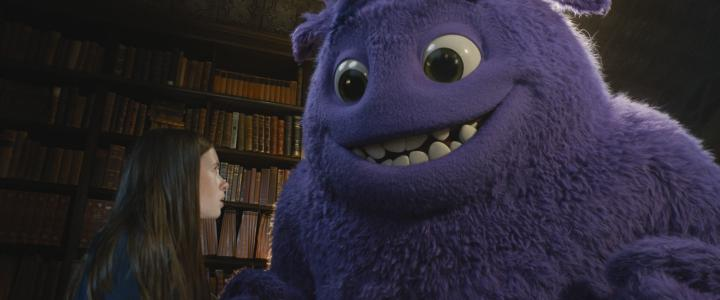
Image from [theNumber](https://www.the-numbers.com/news/256930830-Theater-counts-IF-narrowly-tops-Garfield-to-become-widest-release-on-its-second-weekend-in-theaters)



## Overview
My aim is to gain insights for Microsoft Movie studio by exploring Box office trends.I will do so by analysing genre performance,top grossing films and finding the correlation between rating and film popularity

### Business Understanding

Microsoft wants to set up a Movie Studio and they lack experience in the film industry.
I have therefore been  tasked with exploring box office data to identify the most strategic films the company can invest in.
I decided to break down the main objective into specific objectives to help me achieve my goal such as:

1.To identify the most strategic movie genres to produce based on the data analysed.

2.To determine the top grossing films that the company can invest in by analysing the production cost to effectively maximise on the profits.

3.To identify our target audience that drive box office success so that Microsoft can tailor content that resonates with the audience.

4.To also find the correlation between rating and film popularity to determine whether higher ratings tends to be associated with higher popularity or vice versa





## Data Understanding
In this section we are going to identify our data sets,the source and content of the sets.
The data sources for  this analysis have been pulled from 3 separate files.

**1 .im.db**

Source-This data set comes from [IMDB](https://www.imdb.com/) movie site which is a free and open movies data source

Content-The data in this set includes relevant tables we will use to analyse our problem such as movie ratings and movie basics.We will combine the different tables in this set to come up with our findings

Format-The format for this data set is SQL

**2 .tmdb.movies.csv**

Source-This data set comes from [TMDB](https://www.themoviedb.org/).Which is a community built movie and TV database.The site depends on international communities to provide them with the large breadth of data.

Content-The relevant variables we will use in this set for our analysis includes genre IDs,popularity and vote count which will come in handy.

Format-This data is in csv file format.


**3 .tn.movies_budgets.csv**

Source-This data set comes from [TheNumbers](https://www.the-numbers.com/) Which is a website that provides historical box office data for movies.

Content-The data in the set is categorized by various factors including genre, release date, budget, and domestic/international gross. This data directly addresses our questions about top-grossing films.

Format-The format of this data set is a CSV file.

#### Importing relevant libraries and Loading data

In [198]:
#importing libraries
import pandas as pd
import sqlite3
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [199]:
#loading our data
tmdb = pd.read_csv('./data/tmdb.movies.csv')
the_numbers = pd.read_csv('./data/tn.movie_budgets.csv')
conn = sqlite3.connect('./data/im.db')
cur = conn.cursor()

In [200]:
#combining SQL data and converting into pandas
query = """
SELECT * 
   FROM movie_ratings
   JOIN movie_basics AS m
   USING(movie_id)
   ORDER BY m.start_year DESC
;
"""
imdb = pd.read_sql(query, conn)

### Checking and Cleaning our data
We are now checking our datasets and cleaning them to remain with relevant variables to be used in our exploratory analysis


1.  IMDB Database

In [201]:
#Checking data
imdb.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1673732,8.0,20,Break Clause,Break Clause,2019,NaN,"Drama,Thriller"
3,tt10075374,8.3,6,The Little Prince,The Little Prince,2019,93.0,Action
4,tt10243678,6.5,1394,Chopsticks,Chopsticks,2019,100.0,"Comedy,Drama"


In [202]:
#Checking the shape of our data
imdb.shape

(73856, 8)

In [203]:
#checking imdb information
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [204]:
#checking for null values
imdb.isna().sum()

movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

In [205]:
#data description
imdb.describe()

,averagerating,numvotes,start_year,runtime_minutes
count,73856.000000,7.385600e+04,73856.000000,66236.000000
mean,6.332729,3.523662e+03,2014.276132,94.654040
std,1.474978,3.029402e+04,2.614807,208.574111
min,1.000000,5.000000e+00,2010.000000,3.000000
25%,5.500000,1.400000e+01,2012.000000,81.000000
50%,6.500000,4.900000e+01,2014.000000,91.000000
75%,7.400000,2.820000e+02,2016.000000,104.000000
max,10.000000,1.841066e+06,2019.000000,51420.000000


#### 2.  The MovieDB(tmdb) dataset

In [206]:
#Checking tmdb data
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [207]:
tmdb.shape

(26517, 10)

In [208]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [209]:
#Identifying our data description
tmdb.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [210]:
#Checking for  null values
tmdb.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [211]:
# Drop all the duplicates in original_title variable in order to remain with unique titles
tmdb.drop_duplicates(subset='original_title', inplace=True)
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


3.  The Numbers Movie Budget dataset

In [212]:
#Checking our values
the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [213]:
#data shape
the_numbers.shape

(5782, 6)

In [214]:
#Identifying our data info
the_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [215]:
the_numbers.describe()#checking the description

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [216]:
the_numbers.isna().sum()# checking for any null values

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

### Exploratory Data Analysis (EDA)
From the imdb data set,I will be able to see the movie genre that is highly rated because the data set contains variables with genre and their averagerating.
The below codes helps me identify ratings based on the movie title,genre and averagerating. 

In [217]:
#checking our each unique genre with its average rating
ratings = imdb[['genres', 'averagerating']]
average_ratings_by_genre = ratings.groupby('genres')['averagerating'].mean()
print("Average Rating by Genre:")
print(average_ratings_by_genre)

Average Rating by Genre:
genres
Action                        5.757712
Action,Adult,Comedy           4.650000
Action,Adventure              5.223529
Action,Adventure,Animation    6.562874
Action,Adventure,Biography    7.061905
                                ...   
Thriller                      5.704244
Thriller,War                  5.650000
Thriller,Western              7.150000
War                           6.134043
Western                       5.037333
Name: averagerating, Length: 923, dtype: float64


In [218]:
#Now lets sort our average rating genre findings
sorted_by_rating = average_ratings_by_genre.sort_values(ascending=False)
print("\nAverage Rating by Genre (Sorted):")
print(sorted_by_rating)


Average Rating by Genre (Sorted):
genres
Comedy,Documentary,Fantasy    9.4
Documentary,Family,Musical    9.3
History,Sport                 9.2
Music,Mystery                 9.0
Game-Show                     9.0
                             ... 
Crime,Music                   2.4
Adventure,Crime,Romance       2.3
History,Sci-Fi,Thriller       2.3
Adult,Horror                  2.0
Comedy,Musical,Sport          1.4
Name: averagerating, Length: 923, dtype: float64


#### Plotting our findings on most Popular genre

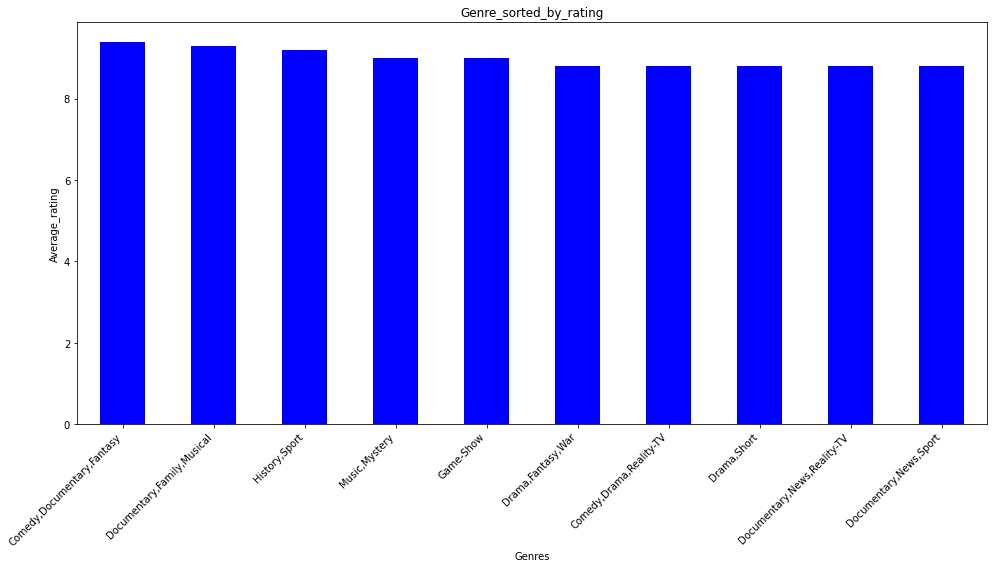

In [219]:
# Plot barplot for the top 10 most popular genres 

Average_rating = sorted_by_rating.head(10)

ax = Average_rating.plot(kind='bar', x='genres', y='averagerating', legend=False, color='blue', figsize=(14,8))

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set plot title and labels
plt.title('Genre_sorted_by_rating')
plt.xlabel('Genres')
plt.ylabel('Average_rating')

# Show the plot
plt.tight_layout()
plt.show();

### Checking the top grossing film

In order for ME to check our top grossing film,I am going to merge my data sets for effective analysis.
I will merge the imdb and tmdb movie sets but before that is done,i will do some cleaning -removing dolar signs and commas on some columns.

### Merging our data frame

In [220]:
# Creating the remove_dollar_sign Function
def remove_dollar_sign(x):
  return (x.strip('$'))  # Remove dollar sign

# Use the function to remove the dollar sign ($)
the_numbers['production_budget']\
    = the_numbers['production_budget'].apply(remove_dollar_sign)
the_numbers['domestic_gross']\
    = the_numbers['domestic_gross'].apply(remove_dollar_sign)
the_numbers['worldwide_gross']\
    = the_numbers['worldwide_gross'].apply(remove_dollar_sign)

# Creating the remove_commas Function
def remove_commas(x):
  return float(x.replace(',', ''))  # Remove the commas and convert into a float

# Use the function to remove the commas t 
the_numbers['production_budget']\
    = the_numbers['production_budget'].apply(remove_commas)
the_numbers['domestic_gross']\
    = the_numbers['domestic_gross'].apply(remove_commas)
the_numbers['worldwide_gross']\
    = the_numbers['worldwide_gross'].apply(remove_commas)

Dropping duplicates from the_numbers

In [222]:
# Drop all the duplicates from the_numbers_movies
# DataFrame
the_numbers.drop_duplicates(subset='movie'\
                                   , keep='first', inplace=True)

# Changing movie column name to original_title
the_numbers.rename(columns ={'movie': 'original_title'}, inplace=True)
the_numbers.head()

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


Merging tmdb and  imdb movies 

In [223]:
# Merging Two DataFrames and giving it variable name
# merged_dataset
merged_dataset = pd.merge(tmdb, imdb, how='inner', on='original_title')

# We are also going to drop all the columns that are currently not valuable 
columns_to_drop = ['genre_ids', 'original_language', 'id', 'title', 'release_date']
merged_dataset = merged_dataset.drop(columns = columns_to_drop)

# Show the first few rows of the merged DataFrame
merged_dataset.head()


,Unnamed: 0,original_title,popularity,vote_average,vote_count,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres
0,0,Harry Potter and the Deathly Hallows: Part 1,33.533,7.7,10788,tt0926084,7.7,425530,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,"Adventure,Fantasy,Mystery"
1,1,How to Train Your Dragon,28.734,7.7,7610,tt0892769,8.1,611299,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation"
2,2,Iron Man 2,28.515,6.8,12368,tt1228705,7.0,657690,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
3,4,Inception,27.920,8.3,22186,tt1375666,8.8,1841066,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
4,5,Percy Jackson & the Olympians: The Lightning T...,26.691,6.1,4229,tt0814255,5.9,165108,Percy Jackson & the Olympians: The Lightning T...,2010,118.0,"Adventure,Family,Fantasy"


I am going to merge the merged_dataset with the_numbers set by using a common column (original_title). 

In [ ]:
# Merging Two DataFrames
merged_data = pd.merge(merged_dataset, the_numbers, how='inner', on='original_title')


# Viewing the contents of the merged data frame
merged_data.head(5)

,Unnamed: 0,original_title,popularity,vote_average,vote_count,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,1,How to Train Your Dragon,28.734,7.7,7610,tt0892769,8.1,611299,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",30,"Mar 26, 2010",165000000.0,217581232.0,4.948710e+08
1,2,Iron Man 2,28.515,6.8,12368,tt1228705,7.0,657690,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",15,"May 7, 2010",170000000.0,312433331.0,6.211564e+08
2,4,Inception,27.920,8.3,22186,tt1375666,8.8,1841066,Inception,2010,148.0,"Action,Adventure,Sci-Fi",38,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08
3,5,Percy Jackson & the Olympians: The Lightning T...,26.691,6.1,4229,tt0814255,5.9,165108,Percy Jackson & the Olympians: The Lightning T...,2010,118.0,"Adventure,Family,Fantasy",17,"Feb 12, 2010",95000000.0,88768303.0,2.230509e+08
4,7,Toy Story 3,24.445,7.7,8340,tt0435761,8.3,682218,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",47,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09


To ensure that all the required data is available, I will  need to add some few columns; total_gross, gross_profit and avg_rating

In [ ]:
# Creating new column of 'total_gross'
merged_data['total_gross'] = merged_data['domestic_gross'] + merged_data['worldwide_gross']

# Creating another column of difference between total gross and production budget
# it will the gross profits made since the release of those movies
merged_data['gross_profit'] = merged_data['total_gross'] - merged_data['production_budget']

# Create new column of average rating
merged_data['avg_rating'] = (merged_data['vote_average'] + merged_data['averagerating'])/2

### Top 10 Most Profitable Genres

In [ ]:
# Create a dataFrame and Group by 'genre' and calculate the average 'gross profit' for each genre
# then sort the dataframe by gross profit from highest to lowest 
most_profitable = merged_data.groupby('genres')['gross_profit'].mean().reset_index()\
.sort_values(by='gross_profit', ascending=False)

# Give the top 10 most profitable genres a variable "most profitable genres"
most_profitable_genres = most_profitable.head(10)
most_profitable_genres

,genres,gross_profit
250,"Family,Fantasy,Musical",1.603214e+09
94,"Adventure,Drama,Sport",1.523208e+09
256,"Fantasy,Musical",1.159682e+09
93,"Adventure,Drama,Sci-Fi",7.325512e+08
100,"Adventure,Fantasy",6.624354e+08
12,"Action,Adventure,Sci-Fi",6.496111e+08
206,"Drama,Family,Fantasy",6.407027e+08
107,"Animation,Comedy,Family",5.268440e+08
118,"Biography,Documentary,History",5.206793e+08
2,"Action,Adventure,Animation",4.964689e+08


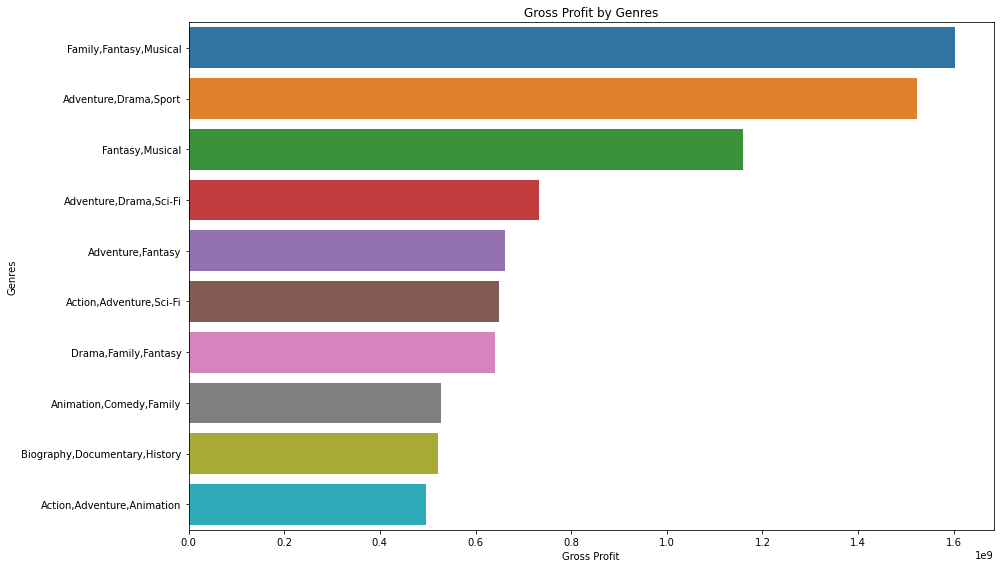

In [ ]:
# Plot a barplot for the most profitable genres in the film industry

# Set the size of the plot
plt.figure(figsize=(14, 8))

# Create a horizontal bar plot using seaborn
sns.barplot(x='gross_profit', y='genres', data=most_profitable_genres, ci = None)

# Set plot title and labels
plt.title('Gross Profit by Genres')
plt.xlabel('Gross Profit')
plt.ylabel('Genres')

# Show the plot
plt.tight_layout()
plt.show();

Checking correlation between rating and popularity

In [ ]:
# Create another DataFrame of variable "find_correlation" which we will be using
# to find correlation between average rating and popularity of all the genres
find_correlation = merged_data.groupby('genres')[['avg_rating', 'popularity']].mean()\
    .reset_index().sort_values(by='avg_rating', ascending=False)

# We now finding correlation between average rating and popularity
correlation = find_correlation['avg_rating'].corr(find_correlation['popularity'])


print(f"The correlation between avg_rating and popularity is: {correlation}")


The correlation between avg_rating and popularity is: 0.20962630931225043


As we can see, correlation between avg_rating and popularity is 0.28376 which is an indication of weak positive correlation. A weak positive correlation between two variables means that as one variable increases, the other variable tends to increase as well, but the relationship is not strong. In other words, there is some positive association between the variables, but it is not consistent or pronounced.

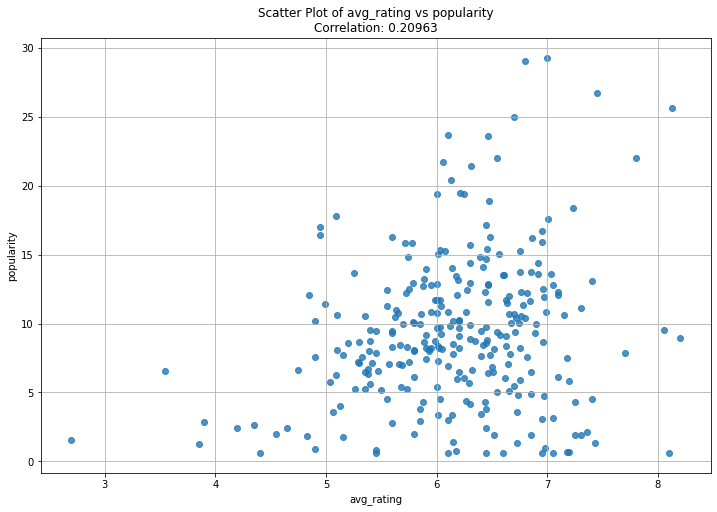

In [ ]:
# Create a scatter plot to visualize the correlation between avg_rating and 
# popularity
plt.figure(figsize=(12, 8))
plt.scatter(find_correlation['avg_rating'], find_correlation['popularity'], alpha=0.8)
plt.title(f'Scatter Plot of avg_rating vs popularity\nCorrelation: {correlation:.5f}')
plt.xlabel('avg_rating')
plt.ylabel('popularity')
plt.grid(True)
plt.show();

In [ ]:
# Create another DataFrame of variable "find_correlation" which we will be using
# to find correlation between average rating and popularity of all the genres
correlation_ = merged_data.groupby('genres')[['gross_profit', 'popularity']].mean()\
    .reset_index().sort_values(by='gross_profit', ascending=False)

# We now finding correlation between average rating and popularity
gross_pop_correlation =correlation_['gross_profit'].corr(correlation_['popularity'])


print(f"The correlation between gross profit and popularity is: {correlation}")

The correlation between gross profit and popularity is: 0.20962630931225043


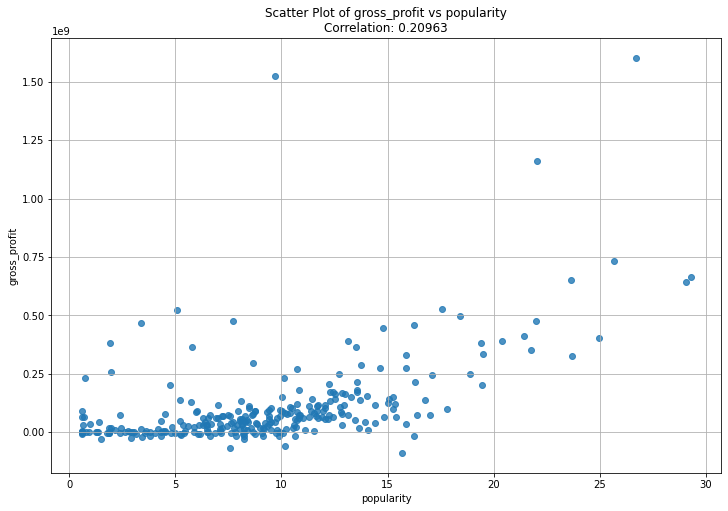

In [ ]:
# Create a scatter plot to visualize the correlation between popularity and 
# popularity
plt.figure(figsize=(12, 8))
plt.scatter(correlation_['popularity'], correlation_['gross_profit'], alpha=0.8)
plt.title(f'Scatter Plot of gross_profit vs popularity\nCorrelation: {correlation:.5f}')
plt.xlabel('popularity')
plt.ylabel('gross_profit')
plt.grid(True)
plt.show();